# SVM Classifier
## Import Packages

In [65]:
# For data management
import pandas as pd
import numpy as np
import pickle

from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline 

## Load Dataset

In [55]:
# LOAD FEATURES AND LABELS FROM PICKLE

# Note: Pickles are mask, incorrect wear of mask dataset in grayscale
# See data pre-processing for more information

pickle_in = open("data.pickle", "rb")
X = pickle.load(pickle_in) # 2-D Feature Set, Data matrix will serve as X

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in) # 1D Target set

In [56]:
# Normalize the pixel values
X = X / 255.0

## Split the dataset into 80% Training and 20% Testing

In [57]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Print the length and width of our testing data.
print('Length of our Training data: ', len(X_train), '\nLength of our Testing data: ', len(X_test))

Length of our Training data:  16724 
Length of our Testing data:  4181


## SVM Classifier 

### Fit Model

In [58]:
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)

SVC()

## Performance Evaluation

In [63]:
y_pred = model_svm.predict(X_test)

### Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.9459459459459459')

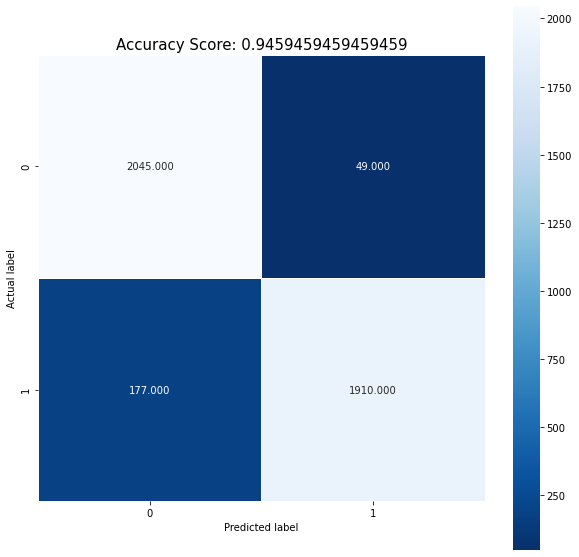

In [66]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,10))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(title,size=15)

### Classification Report

In [67]:
# RECALL
# CLASS 0: CORRECT WEAR OF MASK
# CLASS 1: INCORRECT WEAR OF MASK

print("\nClassification Report\n")
print(metrics.classification_report(y_test, y_pred))


Classification Report

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2094
           1       0.97      0.92      0.94      2087

    accuracy                           0.95      4181
   macro avg       0.95      0.95      0.95      4181
weighted avg       0.95      0.95      0.95      4181



## Predict Image

In [71]:
import cv2

def predictImage(filename):
    img1 = cv2.imread(filename)
    plt.figure()
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    img2 = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img2, (64,64))
    X = np.array(img_resized).flatten().reshape(1, 64*64)
    X = pd.DataFrame(data=X, columns=[cols])
    X = X / 255.0
    val = model_svm.predict(X)
    #print(val)
    if val == 1:
        
        plt.xlabel("Incorrectly Worn",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("Correctly Worn",fontsize=30)

C:\Users\Teoh\.conda\envs\ResearchProject\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Teoh\.conda\envs\ResearchProject\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Teoh\.conda\envs\ResearchProject\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Teoh\.conda\envs\ResearchProject\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.

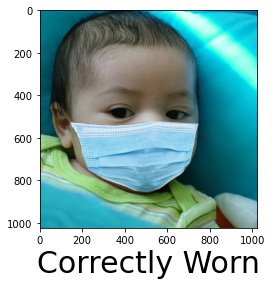

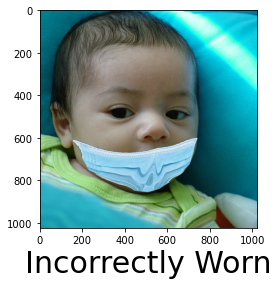

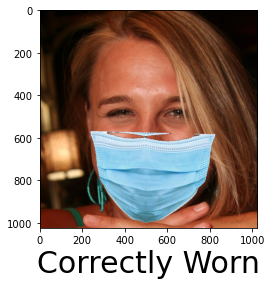

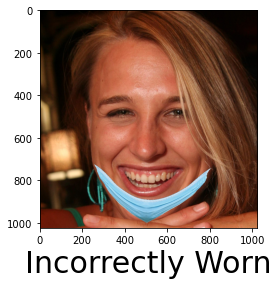

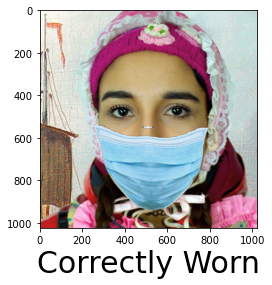

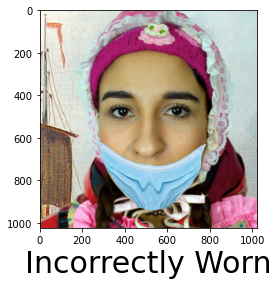

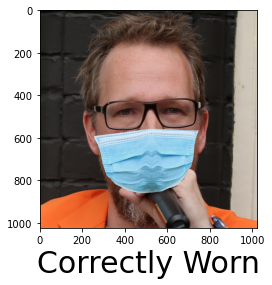

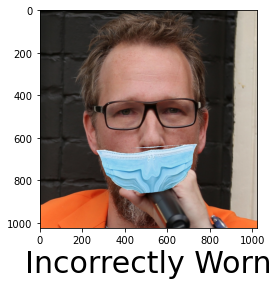

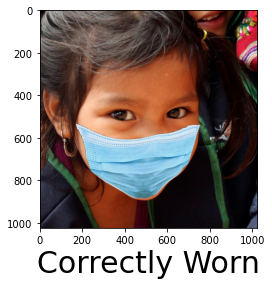

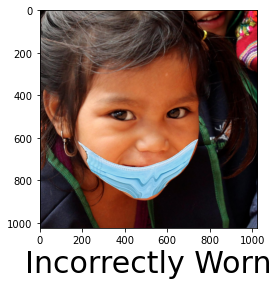

In [72]:
import os
path = "D:\\OneDrive - Universiti Malaya\\Work\Desktop\\UM Master of Data Science\\Sem 2\\3 - Machine Learning (WQD 7006)\\Assignment\\test"
for img in os.listdir(path):
    predictImage(os.path.join(path,img))